In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/kaggle/input/eeg-emotions-help/emotions.csv')

In [3]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [4]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


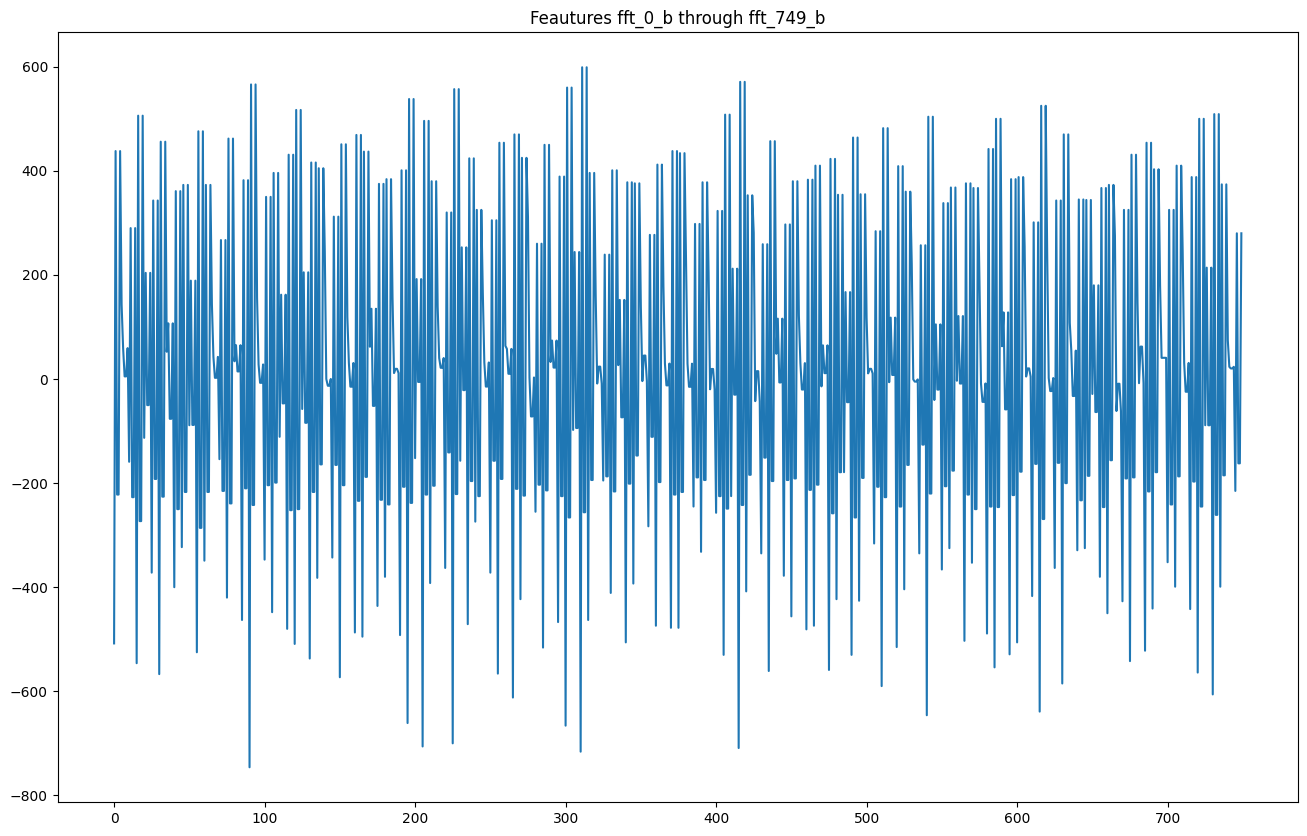

In [5]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()

In [6]:
data['label'].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

In [7]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [8]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_mapping)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

<ipython-input-8-6f24c87f2207>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace(label_mapping)


In [10]:
X_train.shape, X_test.shape

((1492, 2548), (640, 2548))

# Simple RNN

In [11]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,GRU,SimpleRNN,Conv1D,MaxPooling1D,Flatten , Dropout, BatchNormalization

In [12]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# Use a Lambda layer to expand dimensions
expand_dims = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

rnn = tf.keras.layers.SimpleRNN(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(rnn)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

RNN_model = tf.keras.Model(inputs=inputs, outputs=outputs)
RNN_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 2548, 256)           │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,022,915 (7.72 MB)

 Trainable params: 2,022,915 (7.72 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
RNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history_RNN = RNN_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 392ms/step - accuracy: 0.7812 - loss: 23.5949 - val_accuracy: 0.8796 - val_loss: 15.7436
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9393 - loss: 5.6143 - val_accuracy: 0.9030 - val_loss: 11.8516
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9637 - loss: 4.5585 - val_accuracy: 0.8863 - val_loss: 23.6011
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9618 - loss: 3.6498 - val_accuracy: 0.9264 - val_loss: 7.5615
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.9716 - loss: 2.3617 - val_accuracy: 0.9064 - val_loss: 20.4818
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9832 - loss: 0.9956 - val_accuracy: 0.9197 - val_loss: 16.9350
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.9811 - loss: 1.9885 - val_accuracy: 0.8863 - val_loss: 17.9432
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.9888 - loss: 0.4850 - v

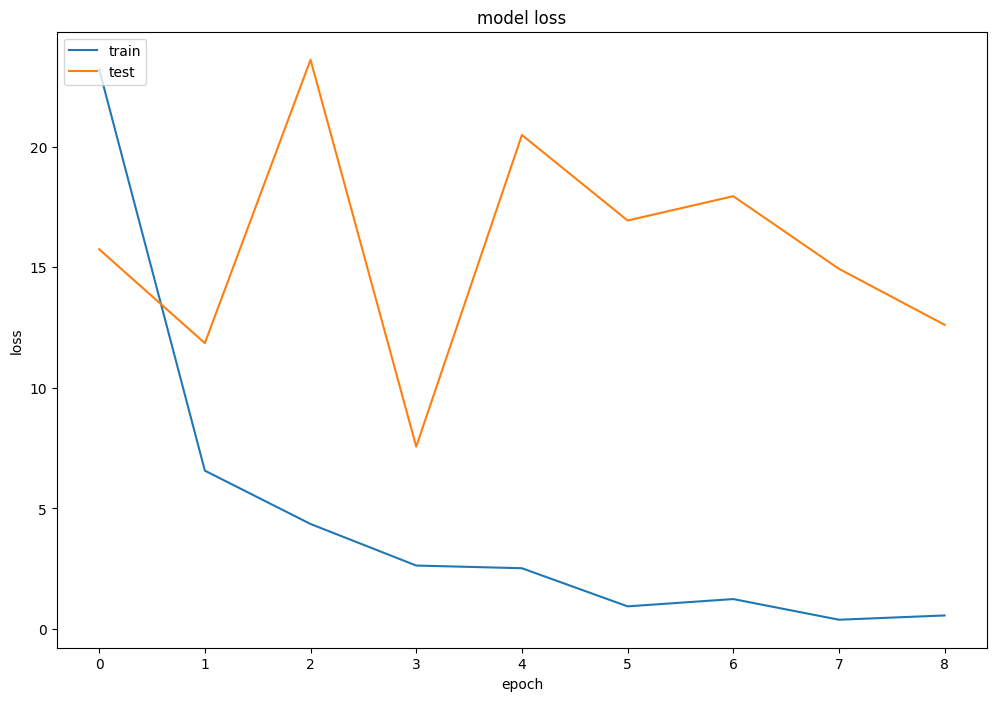

In [15]:
plt.figure(figsize=(12,8))
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

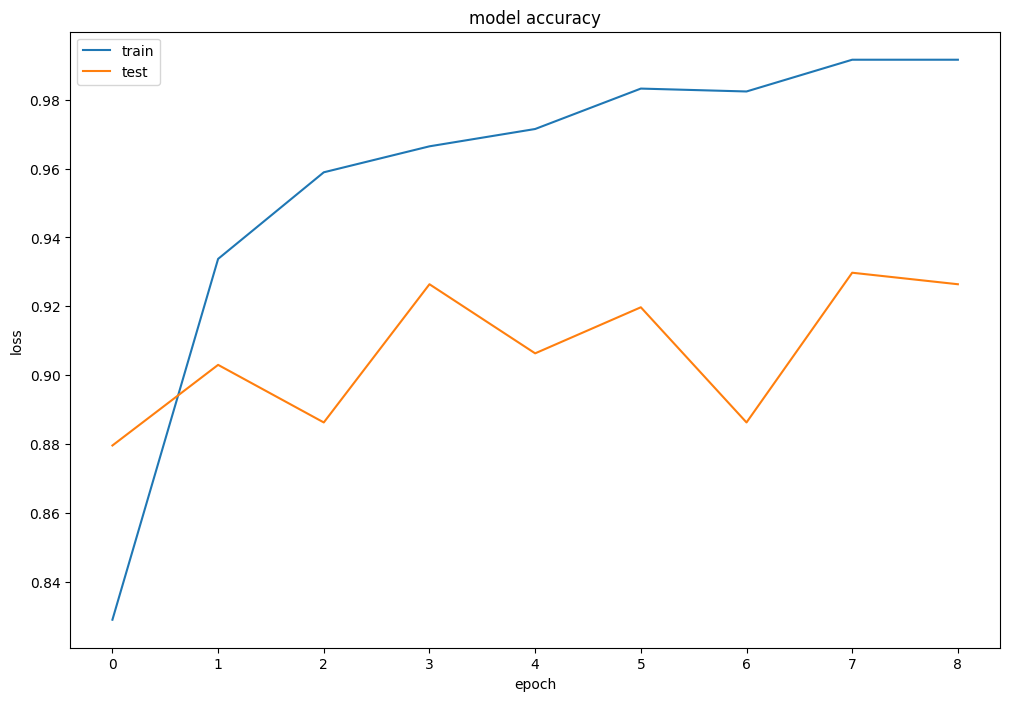

In [16]:
plt.figure(figsize=(12,8))
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
RNN_acc = RNN_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(RNN_acc * 100))

Test Accuracy: 93.125%


In [18]:
y_pred = np.array(list(map(lambda x: np.argmax(x), RNN_model.predict(X_test))))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [19]:
RNN_cm = confusion_matrix(y_test, y_pred)
RNN_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

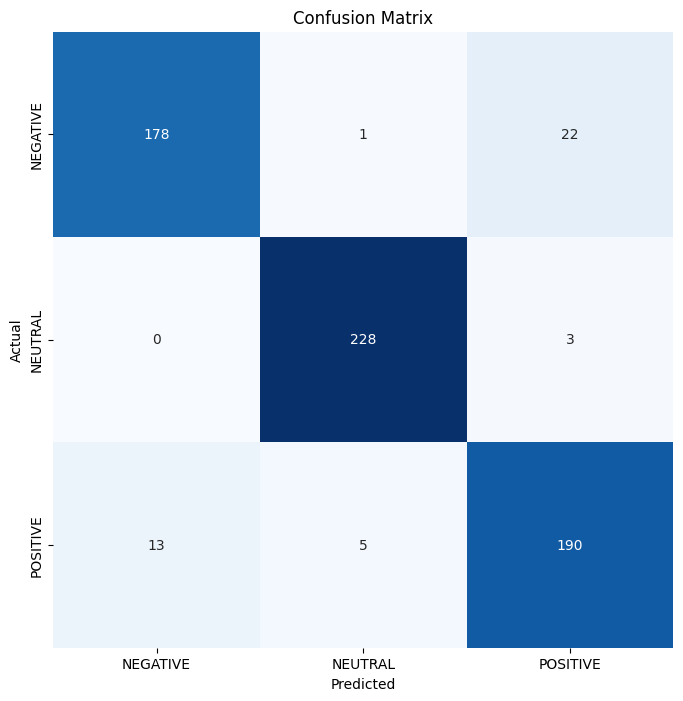

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(RNN_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print("Classification Report:\n----------------------\n", RNN_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.93      0.89      0.91       201
     NEUTRAL       0.97      0.99      0.98       231
    POSITIVE       0.88      0.91      0.90       208

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



# GRU

In [22]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# Use Lambda layer to add sequence dimension
expand_dims = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

GRU_model = tf.keras.Model(inputs=inputs, outputs=outputs)
GRU_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 2548, 256)           │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
GRU_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
history_GRU = GRU_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.6879 - loss: 62.6823 - val_accuracy: 0.8829 - val_loss: 17.6053
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8857 - loss: 9.3932 - val_accuracy: 0.8829 - val_loss: 8.6319
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9534 - loss: 1.6388 - val_accuracy: 0.9431 - val_loss: 3.5012
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9820 - loss: 0.9924 - val_accuracy: 0.8896 - val_loss: 6.0775
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9772 - loss: 1.2485 - val_accuracy: 0.8796 - val_loss: 13.3774
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9714 - loss: 1.2791 - val_accuracy: 0.9365 - val_loss: 3.5667
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9960 - loss: 0.1820 - val_accuracy: 0.9599 - val_loss: 1.8375
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 1.0000 - loss: 1.6966e-07 - val_accur

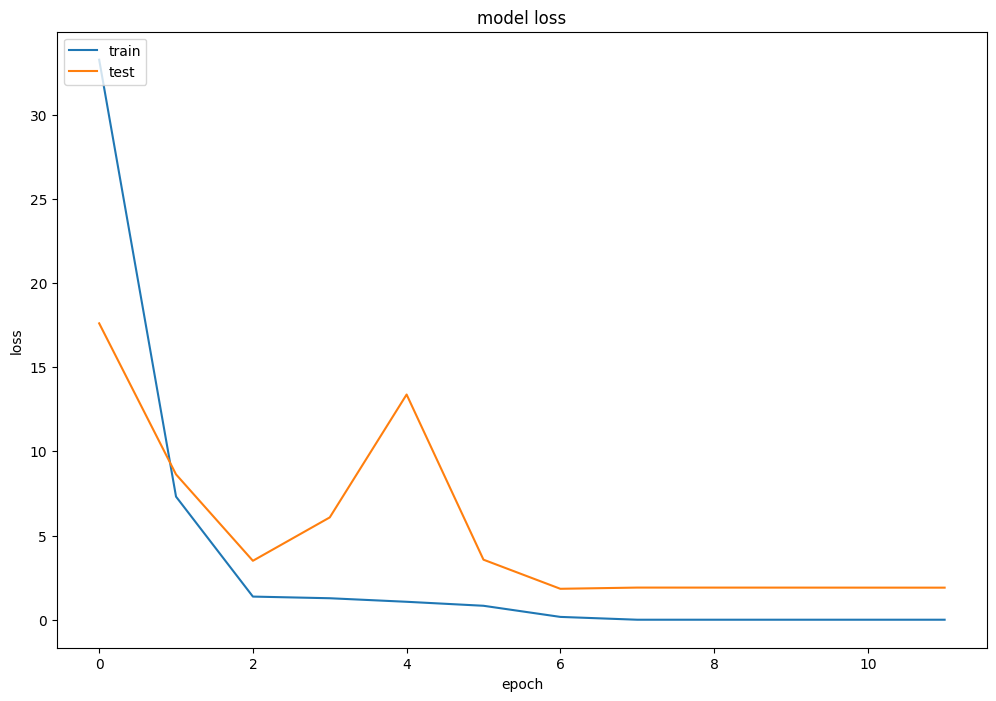

In [25]:
plt.figure(figsize=(12,8))
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

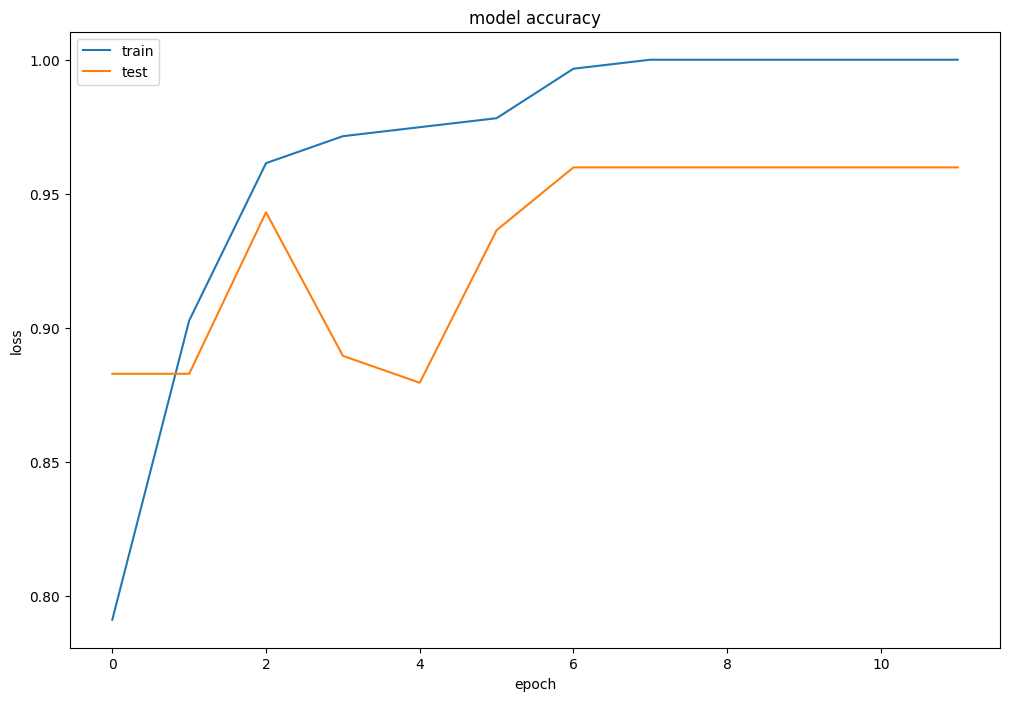

In [26]:
plt.figure(figsize=(12,8))
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
GRU_acc = GRU_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(GRU_acc * 100))

Test Accuracy: 95.938%


In [28]:
y_pred = np.array(list(map(lambda x: np.argmax(x), GRU_model.predict(X_test))))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [29]:
GRU_cm = confusion_matrix(y_test, y_pred)
GRU_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

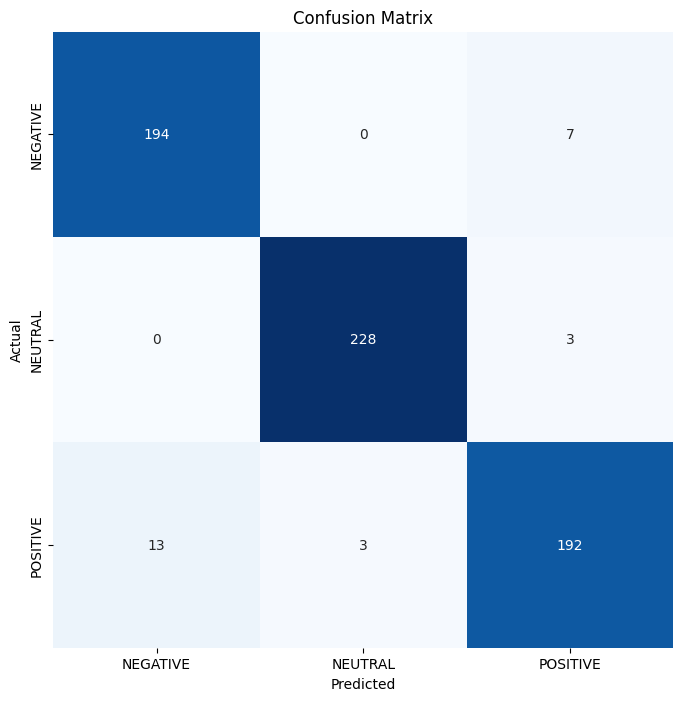

In [30]:
plt.figure(figsize=(8, 8))
sns.heatmap(GRU_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
print("Classification Report:\n----------------------\n", GRU_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.94      0.97      0.95       201
     NEUTRAL       0.99      0.99      0.99       231
    POSITIVE       0.95      0.92      0.94       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



# LSTM

In [32]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# Use Lambda layer to add sequence dimension
expand_dims = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

lstm = tf.keras.layers.LSTM(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(lstm)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

LSTM_model = tf.keras.Model(inputs=inputs, outputs=outputs)
LSTM_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 2548, 256)           │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,221,059 (8.47 MB)

 Trainable params: 2,221,059 (8.47 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
LSTM_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
history_LSTM = LSTM_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.7408 - loss: 16.3920 - val_accuracy: 0.9164 - val_loss: 3.4726
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9570 - loss: 0.7499 - val_accuracy: 0.9298 - val_loss: 3.0257
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9719 - loss: 0.6104 - val_accuracy: 0.9197 - val_loss: 1.7868
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9575 - loss: 1.0798 - val_accuracy: 0.9699 - val_loss: 1.0547
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9914 - loss: 0.1560 - val_accuracy: 0.9431 - val_loss: 1.9087
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9926 - loss: 0.0564 - val_accuracy: 0.9599 - val_loss: 1.6251
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.9902 - loss: 0.1364 - val_accuracy: 0.9465 - val_loss: 1.8218
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.9937 - loss: 0.0973 - val_accuracy: 0

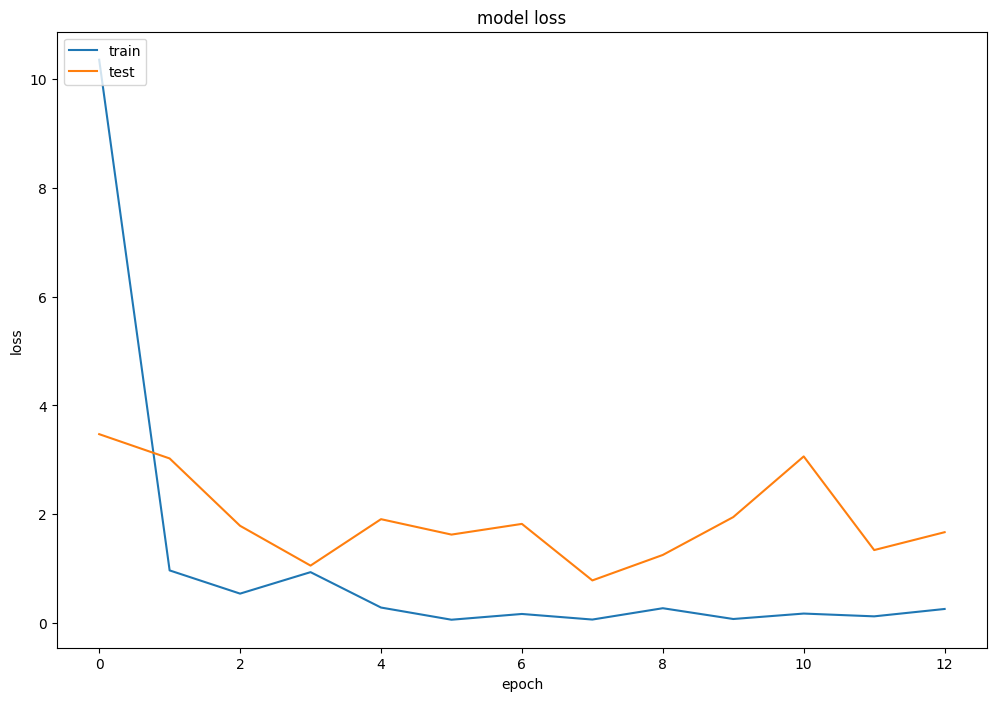

In [35]:
plt.figure(figsize=(12,8))
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

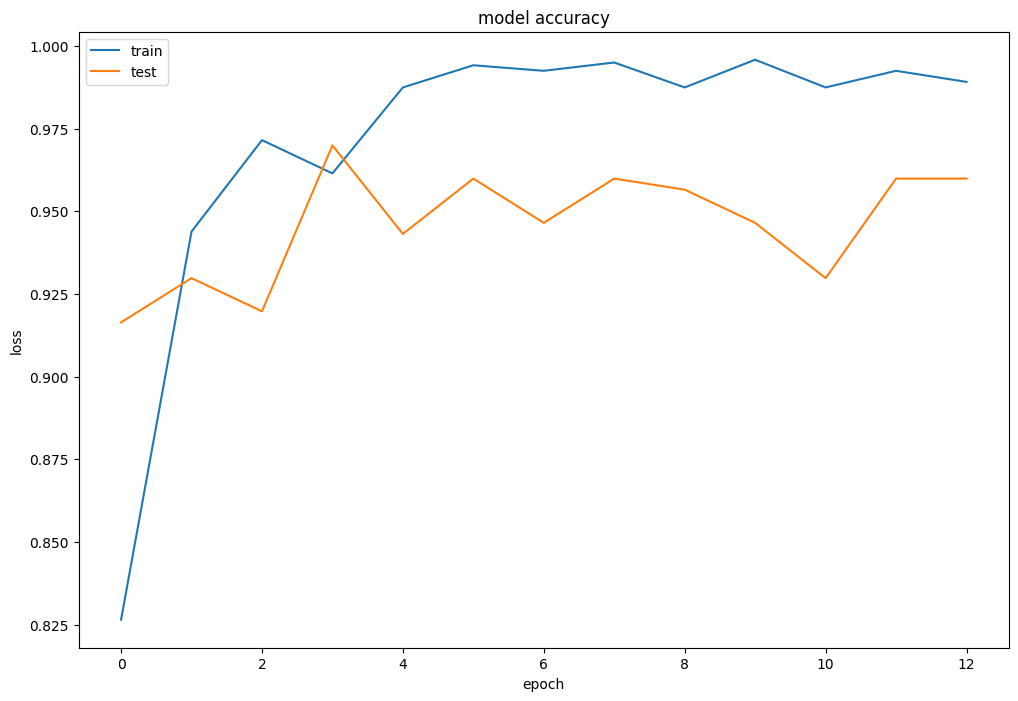

In [36]:
plt.figure(figsize=(12,8))
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
LSTM_acc = LSTM_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(LSTM_acc * 100))

Test Accuracy: 95.625%


In [38]:
y_pred = np.array(list(map(lambda x: np.argmax(x), LSTM_model.predict(X_test))))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [39]:
LSTM_cm = confusion_matrix(y_test, y_pred)
LSTM_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

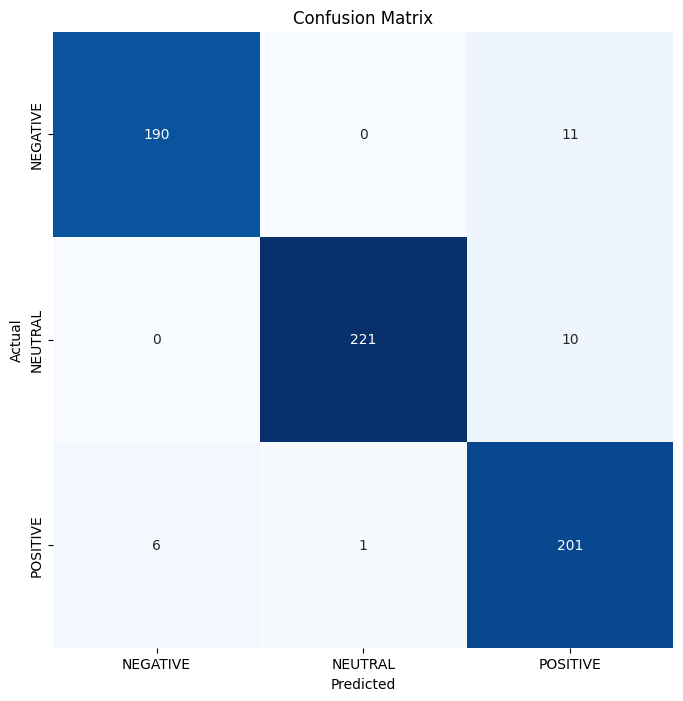

In [40]:
plt.figure(figsize=(8, 8))
sns.heatmap(LSTM_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [41]:
print("Classification Report:\n----------------------\n", LSTM_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.95      0.96       201
     NEUTRAL       1.00      0.96      0.98       231
    POSITIVE       0.91      0.97      0.93       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



# CNN

In [43]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# Use Lambda layer instead of tf.expand_dims directly
expand_dims = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

cnn1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer='l2')(expand_dims)
cnn2 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn1)
cnn3 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer='l2')(cnn2)
cnn4 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn3)

flatten = tf.keras.layers.Flatten()(cnn4)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

CNN_model = tf.keras.Model(inputs=inputs, outputs=outputs)
CNN_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_3 (Lambda)                    │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 2546, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1273, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1271, 32)            │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 635, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 20320)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │          60,963 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,395 (263.26 KB)

 Trainable params: 67,395 (263.26 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
CNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
history_CNN = CNN_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.3919 - loss: 4409532088320.0000 - val_accuracy: 0.5452 - val_loss: 1458486509568.0000
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5235 - loss: 1020339421184.0000 - val_accuracy: 0.5552 - val_loss: 1672261664768.0000
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5028 - loss: 10183557251072.0000 - val_accuracy: 0.3278 - val_loss: 8170538795008.0000
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4082 - loss: 10700114100224.0000 - val_accuracy: 0.5552 - val_loss: 11712543588352.0000
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5042 - loss: 1499635122176.0000 - val_accuracy: 0.5652 - val_loss: 2640881909760.0000
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5086 - loss: 1344728203264.0000 - val_accuracy: 0.5485 - val_loss: 6095375433728.0000


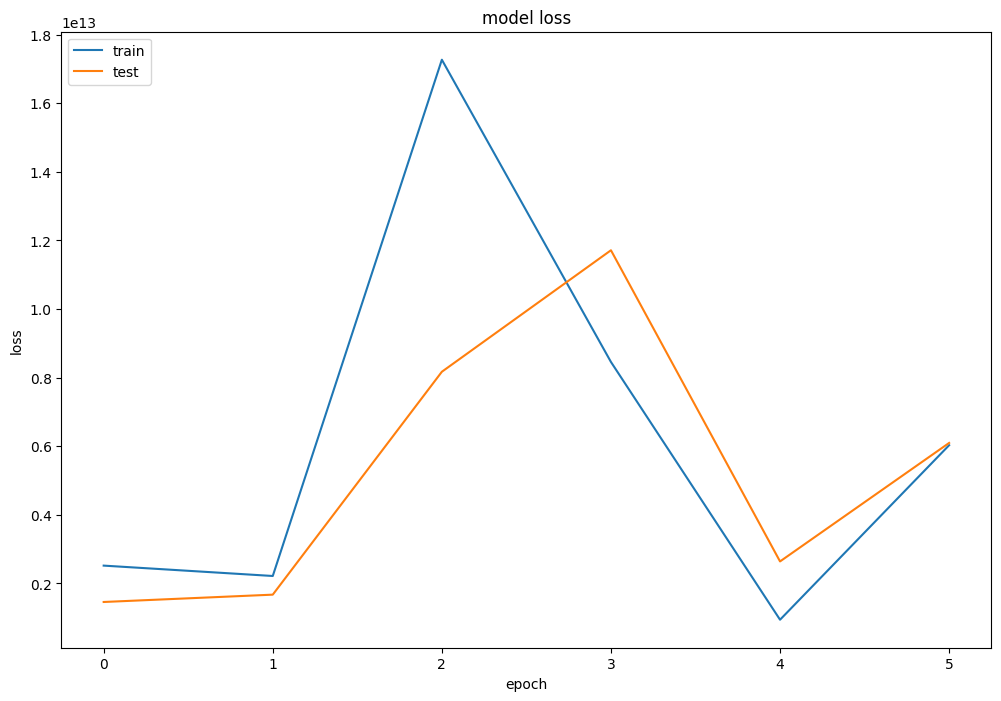

In [47]:
plt.figure(figsize=(12,8))
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

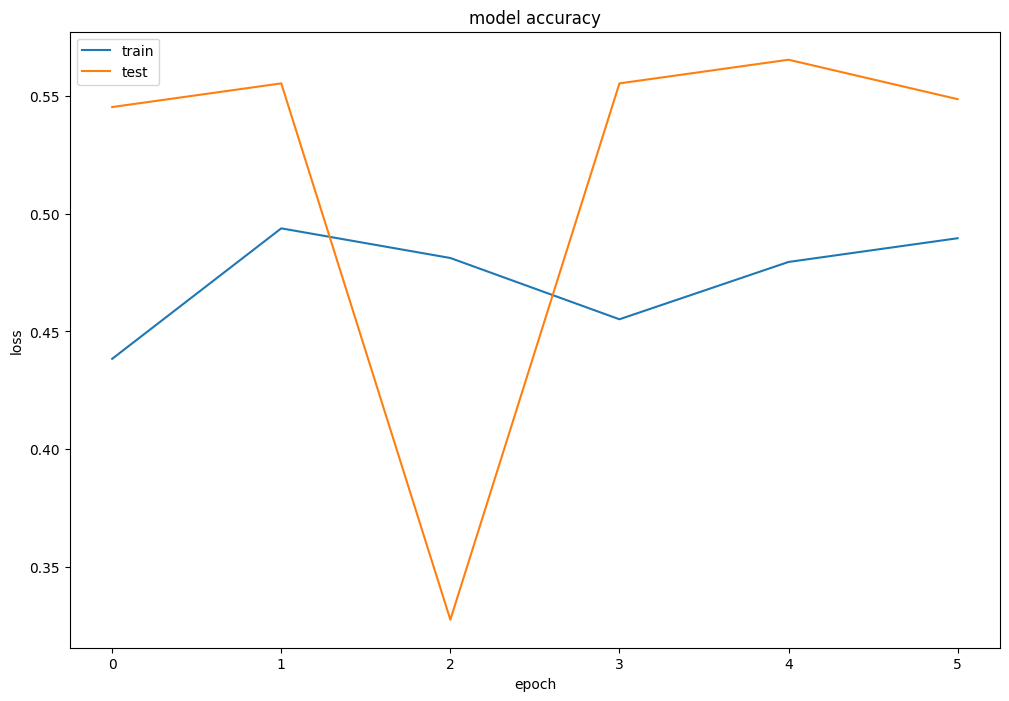

In [48]:
plt.figure(figsize=(12,8))
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
CNN_acc = CNN_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(CNN_acc * 100))

Test Accuracy: 50.156%


In [50]:
y_pred = np.array(list(map(lambda x: np.argmax(x), CNN_model.predict(X_test))))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [51]:
CNN_cm = confusion_matrix(y_test, y_pred)
CNN_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


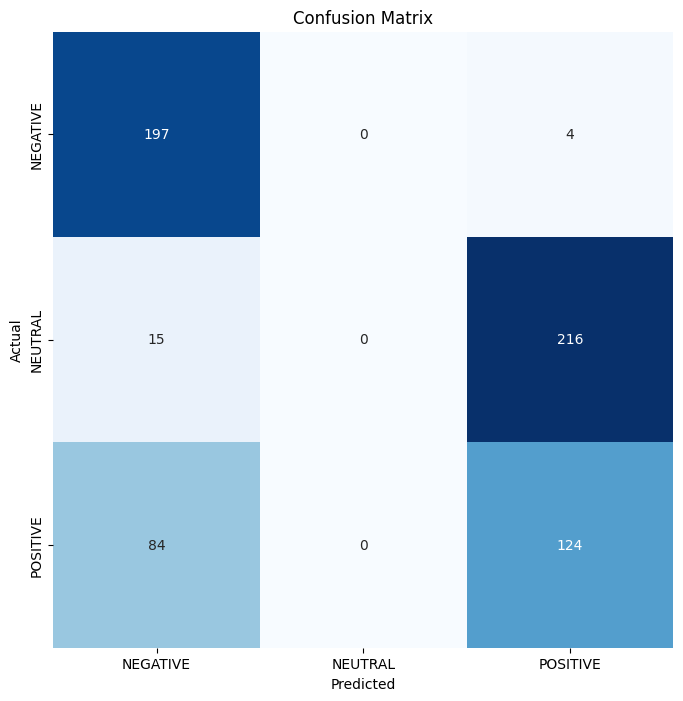

In [52]:
plt.figure(figsize=(8, 8))
sns.heatmap(CNN_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
print("Classification Report:\n----------------------\n", CNN_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.67      0.98      0.79       201
     NEUTRAL       0.00      0.00      0.00       231
    POSITIVE       0.36      0.60      0.45       208

    accuracy                           0.50       640
   macro avg       0.34      0.53      0.41       640
weighted avg       0.33      0.50      0.39       640



#Result Comparision